Author:
Naeimeh Sharghivand <https://www.linkedin.com/in/naeimeh-sharghivand-87666053/>, Henrik <https://github.com/hero-datacoding> & Sohaib

Last modified: 17-Jun-2023

# Importing Required Modules

In [135]:
import pandas as pd
import scipy.stats  as stats
import statsmodels.api as sm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_rows', 1000)
pd.set_option("display.max_colwidth", 500)

# Importing Clean and Quality-assessed Dataset

In [136]:
# Reading clean and quality-assessed Dataset
url = "https://drive.google.com/file/d/1usi-wvGB0Gx0H4c5i_wh6zkRiFqeAjh6/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_parquet(path)

url = "https://drive.google.com/file/d/11IiwRKQXg7brorc9a4L6b8Bbm3lDPlPG/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_merged = pd.read_parquet(path)

# Discount Analysis

## Minor Questions

In [137]:
products_cl.sample(5)

,sku,name,desc,price,in_stock,type
11144,QNA0154,QNAP TS-253A | 4GB RAM Mac and PC Server Nas,2-bay NAS server for Mac and PC,389.99,1,12175397
11693,KIN0150-2,Kingston SO-DIMM memory 8GB (2x4GB) 1333MHz DDR3åÊ,RAM 8GB (2x4GB) MacBook Pro (2011) iMac (2011) and Mac mini (2011),57.98,0,1364
11106,APP0903-A,Open - Apple Mac mini Core i5 14GHz | 8GB RAM | 500GB HDD,PC Mac Mini i5 14GHz 8GB 500GB (MGEM2YP / A).,675.59,0,1298
15424,REP0356,Wi-Fi antenna repair iPad Air,Repair service including parts and labor for iPad Air,69.99,0,"1,44E+11"
15425,REP0375,Wi-Fi Antenna Repair iPad Mini 2,Repair service including parts and labor for iPad Mini 2,79.99,0,"1,44E+11"


In [138]:
orders_merged.sample(5)

,order_id,created_date,total_paid,state,id,product_quantity,sku,unit_price,date,unit_price_total,unit_price_total_sum
31376,433515,2017-11-23 10:23:50,80.74,Completed,1425340,1,BEL0270,80.74,2017-11-23 08:19:40,80.74,80.74
38733,463330,2017-12-15 15:51:39,558.98,Completed,1498193,1,OTT0175,19.99,2017-12-15 11:48:04,19.99,551.99
40038,467575,2017-12-20 09:38:53,1670.98,Completed,1506757,1,APP2124,866.00,2017-12-20 09:32:27,866.00,1670.98
15392,372593,2017-07-04 17:59:49,359.00,Completed,1282367,1,APP1966,359.00,2017-07-04 17:56:32,359.00,359.00
18522,382839,2017-07-27 18:19:10,766.97,Completed,1304161,1,DLK0011,47.99,2017-07-27 14:44:37,47.99,766.97


How many products are there?

In [139]:
products_cl['sku'].nunique()
# 9,945 unique SKUs

9945

How many orders are completed?

In [140]:
orders_merged.state.info()
# 54,306, In stock: 31,156

<class 'pandas.core.series.Series'>
Int64Index: 54306 entries, 0 to 54305
Series name: state
Non-Null Count  Dtype 
--------------  ----- 
54306 non-null  object
dtypes: object(1)
memory usage: 848.5+ KB


What is the time period that the dataset covers?

In [141]:
date_start = orders_merged['created_date']. min()
date_end = orders_merged['created_date']. max()
timespan = date_end - date_start
print(date_start)
print(date_end)
print(timespan)

2017-01-01 01:51:47
2018-03-14 12:03:52
437 days 10:12:05


What is the overall revenue for that time?

In [142]:
b = orders_merged.total_paid.sum()
print(f"Revenue of that Timespan is {b}€")

Revenue of that Timespan is 12084314.41€


-> 12.08 Million Euros (Total Sales)

Are there seasonal patterns in the evolution of sales?

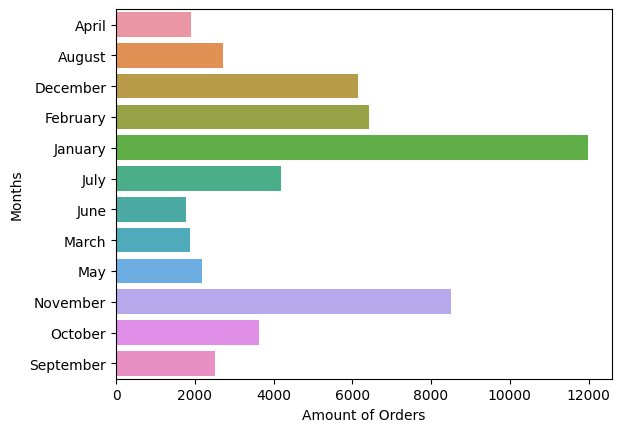

In [143]:
orders_merged['month_n'] = pd.DatetimeIndex(orders_merged['date']).month_name()
df = orders_merged.groupby('month_n', as_index=False).nunique().rename(columns={'date': 'dcount'})
x = df["dcount"]
y = df["month_n"]
sns.barplot(x=x, y=y) # count orders
plt.xlabel("Amount of Orders")
plt.ylabel("Months");

What are the most sold products?

In [144]:
#Merging to create main dataframe(sold_products)
sold_products= pd.merge (orders_merged, products_cl, on='sku')

In [145]:
sold_products['month'] = sold_products.date.dt.month
sold_products['month_n'] = pd.DatetimeIndex(sold_products['date']).month_name()

In [146]:
# Top 20 with the product name
sold_products.groupby("name").product_quantity.sum().nlargest(20)

name
IPhone AppleCare Protection Plan                                        960
Apple Lightning Cable Connector to USB 1m White (OEM)                   827
AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch    558
EarPods Apple Headphones with Remote and Mic (OEM)                      490
Red 4TB WD 35 "Mac PC hard drive and NAS                                481
Crucial MX300 525GB SSD Disk                                            337
Samsung 850 EVO SSD Disk 500GB                                          337
AdaptaDrive NewerTech adapter 2.5 "to 3.5" SATA                         278
Apple iPhone 6 32GB Space Gray                                          270
Crucial MX300 275GB SSD Disk                                            248
Education - Wacom Intuos graphics tablet with pen Draw S White          246
LG 27UD88-W Monitor 27 "UHD 4K USB 3.0 USB-C                            241
WD Red 3TB 35 "Mac PC hard drive and NAS                                240
Matias 

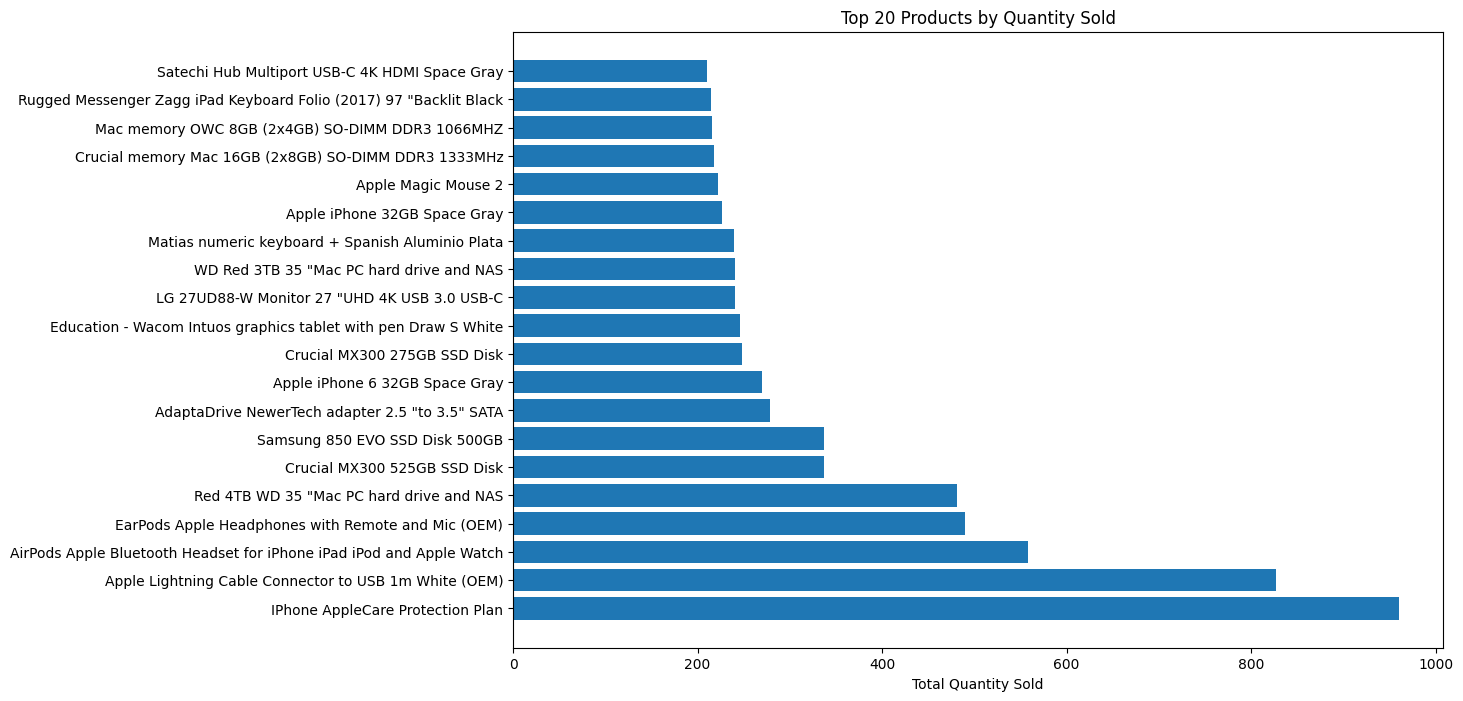

In [147]:
# Plotting the top 20 sold products
top_20 = sold_products.groupby("name").product_quantity.sum().nlargest(20)
top_20 = top_20.sort_values(ascending=False)
# Creating the plot
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20.index, top_20.values)
plt.xlabel("Total Quantity Sold")
plt.title("Top 20 Products by Quantity Sold")
plt.show()

What are the products type that generate the most revenue?

In [148]:
sold_products.groupby('type').agg({'unit_price_total': 'sum', 'name': 'first', 'sku': 'first'}).nlargest(20, 'unit_price_total')

,unit_price_total,name,sku
type,,,
11935397,751351.92,LaCie Porsche Design Desktop Drive 4TB USB 3.0 External Hard Drive,LAC0212
1296,663982.47,"LG 27UD88-W Monitor 27 ""UHD 4K USB 3.0 USB-C",LGE0044
12175397,466720.01,QNAP TS-431P NAS,QNA0203
12215397,459158.32,Crucial MX300 525GB SSD Disk,CRU0051
1364,394759.29,Mac OWC Memory 8GB 1066MHZ DDR3 SO-DIMM,OWC0074
12655397,390197.95,"Seagate Barracuda 3TB 35 ""SATA hard drive Mac and PC",SEA0044
51601716,315985.72,Apple iPhone SE 128GB Rose Gold,APP1973
11905404,289253.86,Parrot 550mAh battery for MiniDrones,PAR0074
5384,264088.69,AirPods Apple Bluetooth Headset for iPhone iPad iPod and Apple Watch,APP1922


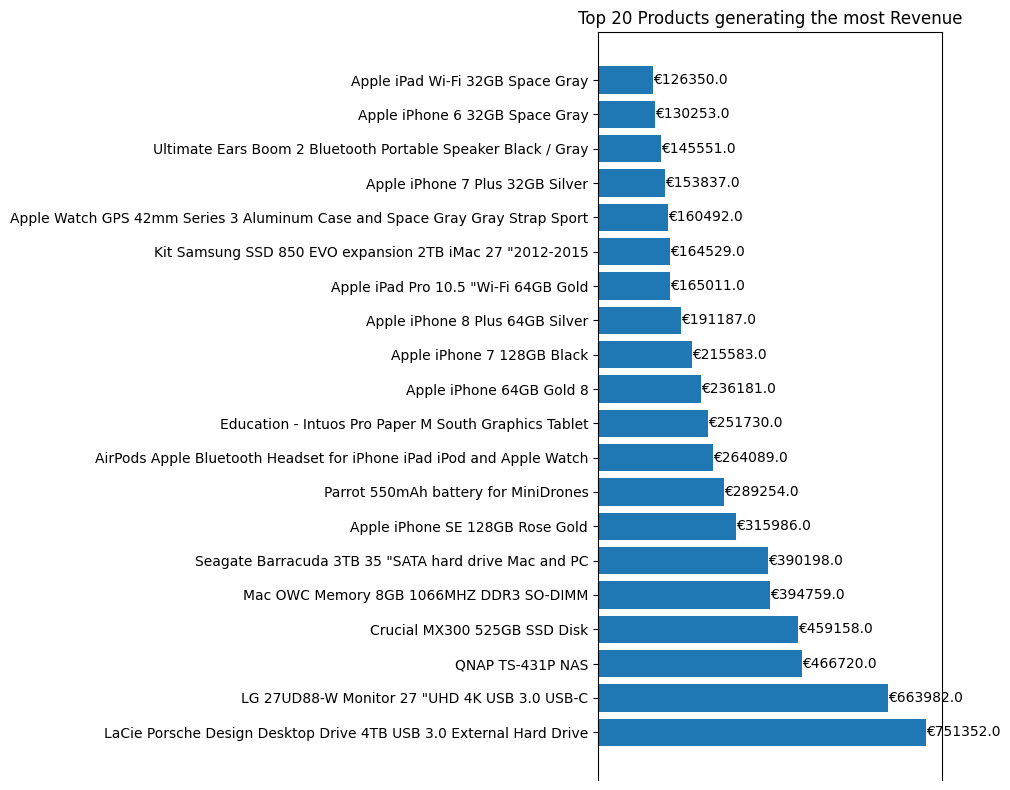

In [149]:
# Grouping the data by 'type' and calculating the sum of 'unit_price_total'
grouped_data = sold_products.groupby('type').agg({'unit_price_total': 'sum', 'name': 'first', 'sku': 'first'})
top_20 = grouped_data.nlargest(20, 'unit_price_total')
top_20 = top_20.sort_values('unit_price_total', ascending=False).round()

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 8))
bars = ax.barh(top_20['name'], top_20['unit_price_total'])
ax.set_title("Top 20 Products generating the most Revenue")

# Adding the rounded unit price in front of each bar
for bar, value in zip(bars, top_20['unit_price_total']):
    ax.text(bar.get_width() + 100, bar.get_y() + bar.get_height() / 2, f"€{value}", va='center')

# Removing the x-axis
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis='x', which='both', bottom=False, labelbottom=False)

plt.tight_layout()
plt.show()


In [150]:
sold_products.groupby(["type"]).unit_price_total.sum().nlargest(20).sum().round()

5936201.0

In [151]:
# this amount (5936201.0) gives ~50% of revenue!
5936201*100/12000000

49.46834166666667

In [152]:
orders_merged.sku.nunique()

5131

In [153]:
sold_products.loc[sold_products['sku'].str.startswith('APP'),['sku']].nunique()

sku    575
dtype: int64

In [154]:
sold_products.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54306 entries, 0 to 54305
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              54306 non-null  int64         
 1   created_date          54306 non-null  datetime64[ns]
 2   total_paid            54306 non-null  float64       
 3   state                 54306 non-null  object        
 4   id                    54306 non-null  int64         
 5   product_quantity      54306 non-null  int64         
 6   sku                   54306 non-null  object        
 7   unit_price            54306 non-null  float64       
 8   date                  54306 non-null  datetime64[ns]
 9   unit_price_total      54306 non-null  float64       
 10  unit_price_total_sum  54306 non-null  float64       
 11  month_n               54306 non-null  object        
 12  name                  54306 non-null  object        
 13  desc            

In [155]:
# Creating the discount column
# Computing the percentage share of discount for each order
sold_products['discount'] = (sold_products['price'] - sold_products['unit_price'])/sold_products['price']*100

In [156]:
sold_products.loc[sold_products['discount'] >0].shape[0]

50483

In [157]:
sold_products.loc[sold_products['discount'] <0].shape[0]

1567

In [158]:
sold_products.loc[sold_products['discount'] == 0].shape[0]

2256

In [159]:
# Descriptive statistics of discounts
sold_products.discount.describe()

count   54306.00
mean       21.63
std        18.20
min      -212.27
25%         9.33
50%        18.04
75%        29.14
max        97.71
Name: discount, dtype: float64

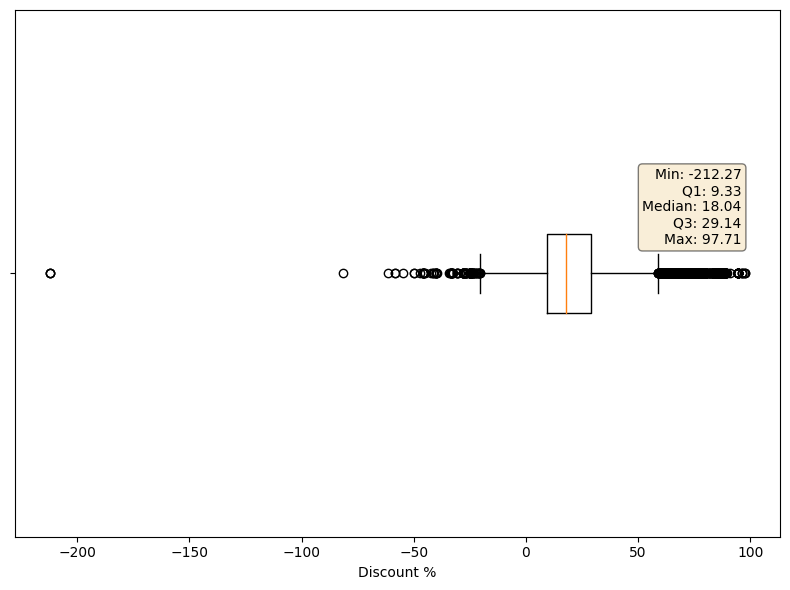

In [160]:
# descriptive statistics for the 'discount' column
discount_stats = sold_products.discount.describe()

# Creating the box plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(sold_products.discount, vert=False)

ax.set_xlabel('Discount %')
#ax.set_title('Discount (%)')

ax.set_yticklabels([])

# Adding text with descriptive statistics above the box plot
text = f"Min: {discount_stats['min']:.2f}\nQ1: {discount_stats['25%']:.2f}\nMedian: {discount_stats['50%']:.2f}\nQ3: {discount_stats['75%']:.2f}\nMax: {discount_stats['max']:.2f}"
ax.text(0.95, 0.7, text, transform=ax.transAxes, verticalalignment='top', horizontalalignment='right',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()


## Business Questions

How should products be classified into different categories to simplify reports and analysis?

In [161]:
# Apple and non-Apple products
sold_products['apple_or_not'] = sold_products['sku'].str.contains("AP|PAC",case=False)

In [162]:
# Number of Apple products
sold_products[sold_products['apple_or_not'] == False].shape[0]

42280

In [163]:
# Number of non-Apple products
sold_products[sold_products['apple_or_not'] == True].shape[0]

12026

What are the most sold products?

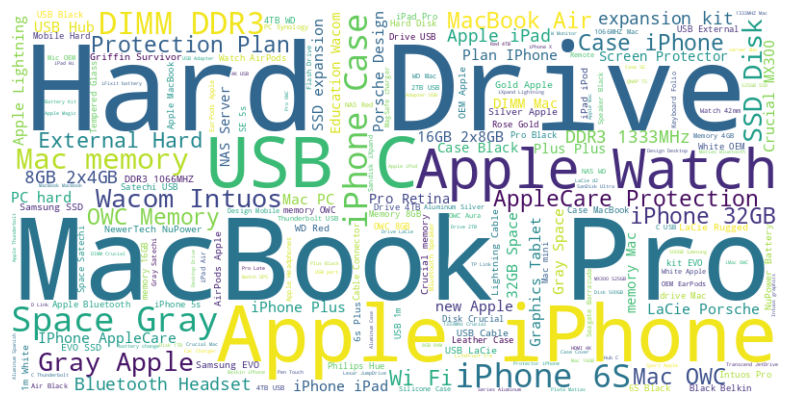

In [164]:
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(sold_products.name))
# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [165]:
# Creating an empty category column
sold_products['category'] = ''

In [166]:
# Creating Apple category
sold_products.loc[sold_products['sku'].str.contains("AP|PAC",case=False), 'category'] += 'apple'

In [167]:
# Creating non-Apple category
sold_products.loc[~sold_products['sku'].str.contains("AP|PAC", case=False), 'category'] += 'non_apple'

In [168]:
sold_products[sold_products['category'] =='non_apple'].category.count()

42280

In [169]:
sold_products[sold_products['category'] =='apple'].category.count()

12026

In [170]:
# Creating a sub-category of Apple hardware
sold_products.loc[(sold_products['category'] == 'apple') & (sold_products['price'] > 200), 'category'] += ' hardware'

In [171]:
sold_products[sold_products['category'] =='apple hardware'].category.count()

5226

In [172]:
# Creating a sub-category of Apple accessories
sold_products.loc[(sold_products['category'] == 'apple') & (sold_products['price'] <= 200), 'category'] += ' accessories'

In [173]:
sold_products[sold_products['category'] =='apple accessories'].category.count()

6800

In [174]:
#Total apple products
6800+5226

12026

In [175]:
# Price distribution for hard drives
sold_products.loc[sold_products['name'].str.contains('hard drive' , case=False)].price.describe()

count   3815.00
mean     186.31
std      120.22
min       35.99
25%      112.00
50%      139.99
75%      229.00
max     1049.00
Name: price, dtype: float64

In [176]:
# Creating a sub-category of non-Apple hardware
sold_products.loc[(sold_products['category'] == 'non_apple') & (sold_products['price'] > 100), 'category'] += ' hardware'

In [177]:
# Creating a sub-category of non-Apple accessories
sold_products.loc[(sold_products['category'] == 'non_apple') & (sold_products['price'] <= 100), 'category'] += ' accessories'

In [178]:
sold_products[sold_products['category'] =='non_apple hardware'].category.count()

15438

In [179]:
sold_products[sold_products['category'] =='non_apple accessories'].category.count()

26842

In [180]:
# Total non_apple products
15438+26842

42280

What is the distribution of product prices across different categories? How many products are being discounted?

In [181]:
# Grouping the data by the 'category' column and calculating various aggregate statistics for the 'price' and 'discount' columns
sold_products.groupby('category').agg({'price':['min', 'max', 'mean', 'sum', 'count'], 'discount':['min', 'max', 'mean']})

price                                  discount        \
                         min     max   mean        sum  count      min   max   
category                                                                       
apple accessories       9.00  199.00  73.17  497540.92   6800    -7.17 86.46   
apple hardware        200.98 1799.00 565.89 2957363.79   5226   -26.02 82.95   
non_apple accessories   2.99   99.99  49.44 1326979.91  26842  -212.27 97.71   
non_apple hardware    100.77 1299.00 260.39 4019858.98  15438   -61.34 90.82   

                             
                       mean  
category                     
apple accessories     22.54  
apple hardware        12.17  
non_apple accessories 25.54  
non_apple hardware    17.65

In [182]:
#adding month columns
sold_products['month'] = sold_products.date.dt.month
sold_products['month_n'] = pd.DatetimeIndex(sold_products['date']).month_name()

In [183]:
# Create the discount column in Euro
# Computing discount for each order
sold_products['discount_euro'] = sold_products['price'] - sold_products['unit_price']

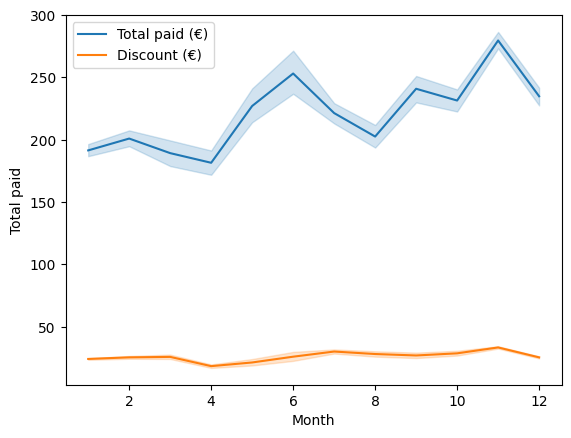

In [184]:
yy = sold_products.groupby('month').agg({'total_paid':'sum','discount_euro': 'sum'}).reset_index()
sns.lineplot(data=sold_products, x='month', y= 'total_paid',label= "Total paid (€)");
sns.lineplot(data=sold_products, x='month', y= 'discount_euro', label= "Discount (€)");
plt.xlabel('Month')
plt.ylabel("Total paid");

In [185]:
sold_products['discount'].describe()
# On average 22% discount

count   54306.00
mean       21.63
std        18.20
min      -212.27
25%         9.33
50%        18.04
75%        29.14
max        97.71
Name: discount, dtype: float64

How do seasonality and special dates (Christmas, Black Friday) affect sales?

In [186]:
df = orders_merged.resample('M', on='date')['date'].count().reset_index(name='dcount')

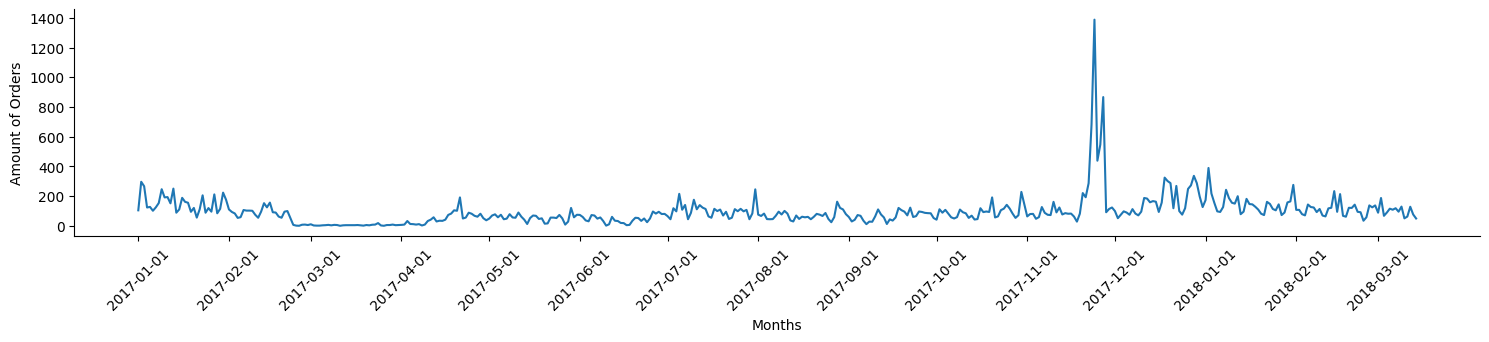

In [187]:
# Comparison of seasonal sales
df = orders_merged.resample('d', on='date')['order_id'].nunique().reset_index(name='dcount')
y=df["dcount"]
x=df.iloc[:,0]
sns.relplot(kind="line",x=x,y=y, height = 3, aspect = 5); #count orders
plt.ylabel("Amount of Orders")
plt.xlabel("Months")
#plt.xticks(df.date.dt.isocalendar().week.to_period("m").unique(),rotation=90);
plt.xticks(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
'2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
'2018-03'],rotation=45);


In [188]:
df.date.dt.to_period("M").unique()

<PeriodArray>
['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
 '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
 '2018-03']
Length: 15, dtype: period[M]

Correlation between discount and revenue/sales

In [189]:
sold_products['discount'].corr(sold_products['total_paid'])
stats.pearsonr(sold_products['discount'], sold_products['total_paid'])
#increase in discount leads to a decrease in revenue. It is bringing loss

PearsonRResult(statistic=-0.2510914107833144, pvalue=0.0)

In [190]:
stats.pearsonr(sold_products['discount'], sold_products['product_quantity'])
# increase in discont leads to higher sales.

PearsonRResult(statistic=0.01542869783873483, pvalue=0.00032366885161424266)